In [7]:
from sklearn.datasets import load_wine
import pandas as pd

# Загрузка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Информация о данных
print("Размерность данных:", X.shape)
print("Классы:", wine.target_names)
print("Количество образцов в каждом классе:\n", pd.Series(y).value_counts())

Размерность данных: (178, 13)
Классы: ['class_0' 'class_1' 'class_2']
Количество образцов в каждом классе:
 1    71
0    59
2    48
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# Проверка на пропуски
print("Количество пропусков в данных:\n", X.isnull().sum())

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Количество пропусков в данных:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} образцов")
print(f"Тестовая выборка: {X_test.shape[0]} образцов")

Обучающая выборка: 142 образцов
Тестовая выборка: 36 образцов


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42)
}

# Обучение моделей
for name, model in models.items():
    model.fit(X_train, y_train)

In [11]:
from sklearn.metrics import accuracy_score, f1_score

# Оценка моделей
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {"Accuracy": accuracy, "F1-score": f1}
    print(f"{name}: Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

Logistic Regression: Accuracy = 0.9722, F1-score = 0.9710
SVM: Accuracy = 0.9722, F1-score = 0.9710
Decision Tree: Accuracy = 0.9444, F1-score = 0.9457


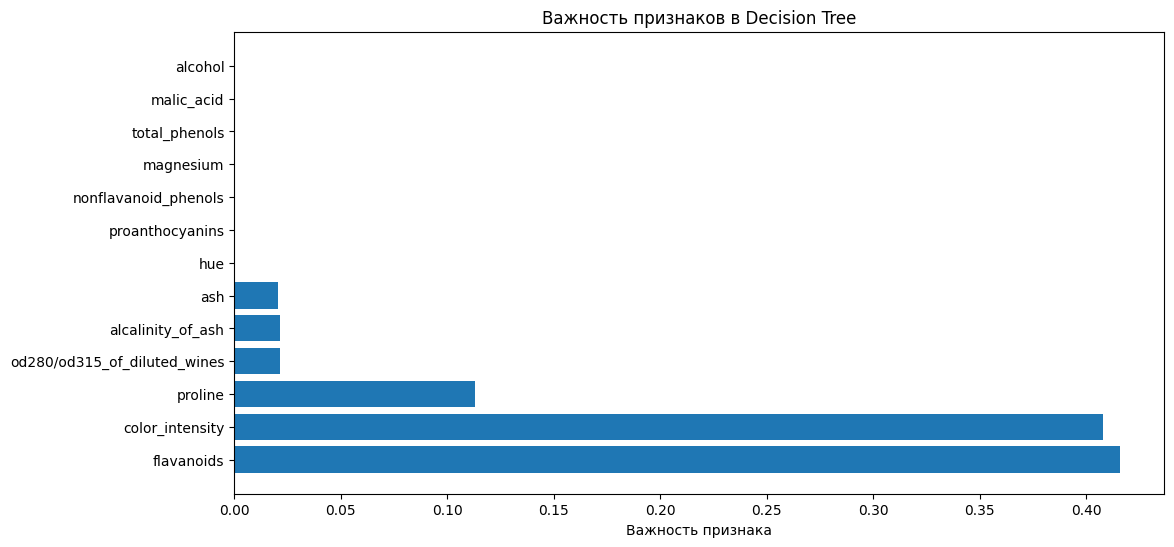

In [12]:
import matplotlib.pyplot as plt

# Получение важности признаков
tree_model = models["Decision Tree"]
importances = tree_model.feature_importances_
feature_names = wine.feature_names

# Сортировка
indices = importances.argsort()[::-1]

# Визуализация
plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Важность признака")
plt.title("Важность признаков в Decision Tree")
plt.show()

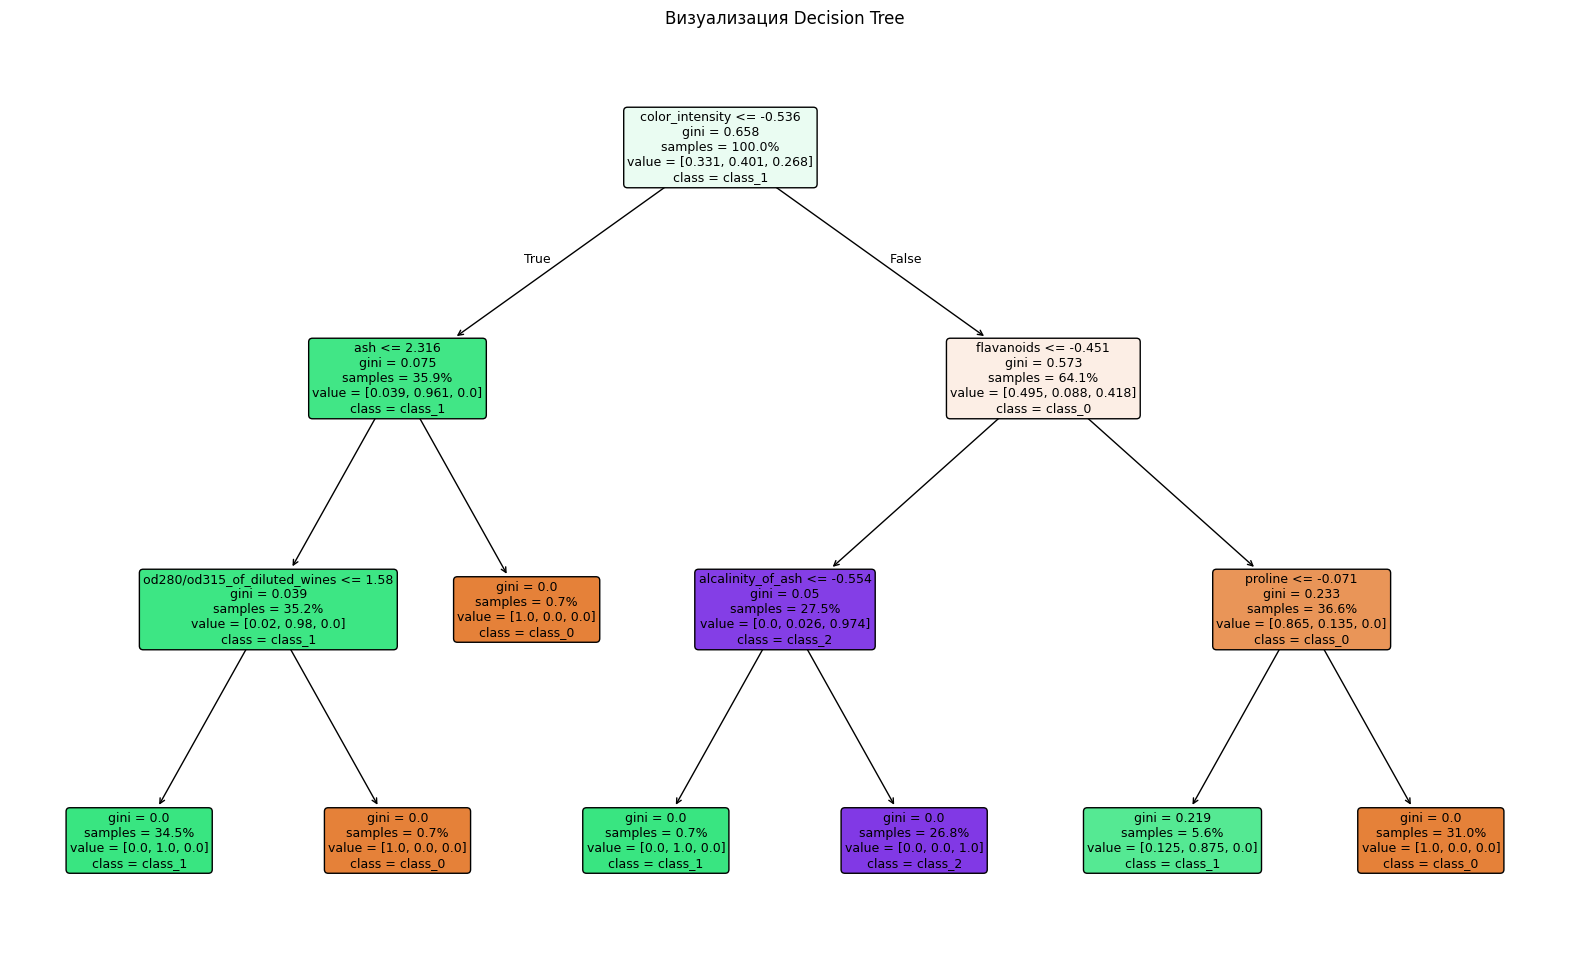

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(
    tree_model,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    proportion=True
)
plt.title("Визуализация Decision Tree")
plt.show()